In [17]:

import torch
import torch.nn as nn


In [1]:
paragraph = "Natural language processing is a fascinating field of artificial intelligence."

In [2]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
tokens = word_tokenize(paragraph.lower())
sentences = [tokens] 

In [5]:
sentences

[['natural',
  'language',
  'processing',
  'is',
  'a',
  'fascinating',
  'field',
  'of',
  'artificial',
  'intelligence',
  '.']]

In [6]:
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, sg=0)


In [7]:
model.wv['language']

array([ 0.00805032,  0.00869828,  0.01991465, -0.00894801, -0.00277418,
       -0.01463869, -0.01939531, -0.01816622, -0.00204768, -0.01300286,
        0.00969965, -0.01232923,  0.00503666,  0.00147484, -0.00678588,
       -0.00195731,  0.01995995,  0.0182968 , -0.00892614,  0.01816928,
       -0.01128177,  0.01186771, -0.00619591,  0.00685921,  0.00603751,
        0.01380274, -0.00474421,  0.01755155,  0.01517907, -0.01910217,
       -0.01601864, -0.01527592,  0.00585011, -0.0055862 , -0.01386368,
       -0.01625729,  0.01662351,  0.00397879, -0.01865978, -0.00958276,
        0.00627506, -0.00942734,  0.01056474, -0.00846769,  0.00528943,
       -0.01609037,  0.01241625,  0.00963498,  0.00157505,  0.00603105],
      dtype=float32)

In [8]:
model.wv['natural']

array([-1.7454965e-02,  4.2603230e-03, -1.7470884e-03, -1.8638177e-02,
       -1.8856285e-02, -2.8214359e-03,  8.8648172e-03,  7.4081421e-03,
       -1.2997386e-02, -1.3746135e-02, -9.9988244e-03, -4.5736884e-03,
       -1.4500575e-02, -1.9206636e-02, -5.4872585e-03, -1.6725682e-02,
       -1.2077752e-02, -1.1341858e-02, -4.6882750e-03, -3.4139943e-03,
       -1.7913997e-02, -1.4703989e-03,  1.6305013e-02,  1.5380859e-02,
       -1.4412232e-02, -7.3336624e-03,  6.2371041e-03, -1.9141445e-02,
        2.9528784e-03,  1.3048933e-02,  1.1492839e-02, -1.7526124e-02,
       -9.0342881e-03, -1.6280321e-02,  9.1912749e-05,  1.8527268e-02,
        1.1946611e-02,  1.0134616e-02,  1.0122125e-02, -6.4858343e-03,
        1.9104367e-02, -1.4712849e-02, -1.4540775e-02, -4.5307782e-03,
       -1.5571213e-03, -6.4322068e-03, -1.1851717e-03,  1.4977646e-02,
       -1.3950372e-03, -3.2498813e-03], dtype=float32)

In [12]:
embeddings = torch.tensor([model.wv[word] for word in tokens])  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9680\3050635076.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  embeddings = torch.tensor([model.wv[word] for word in tokens])


In [13]:
embeddings[0]

tensor([-1.7455e-02,  4.2603e-03, -1.7471e-03, -1.8638e-02, -1.8856e-02,
        -2.8214e-03,  8.8648e-03,  7.4081e-03, -1.2997e-02, -1.3746e-02,
        -9.9988e-03, -4.5737e-03, -1.4501e-02, -1.9207e-02, -5.4873e-03,
        -1.6726e-02, -1.2078e-02, -1.1342e-02, -4.6883e-03, -3.4140e-03,
        -1.7914e-02, -1.4704e-03,  1.6305e-02,  1.5381e-02, -1.4412e-02,
        -7.3337e-03,  6.2371e-03, -1.9141e-02,  2.9529e-03,  1.3049e-02,
         1.1493e-02, -1.7526e-02, -9.0343e-03, -1.6280e-02,  9.1913e-05,
         1.8527e-02,  1.1947e-02,  1.0135e-02,  1.0122e-02, -6.4858e-03,
         1.9104e-02, -1.4713e-02, -1.4541e-02, -4.5308e-03, -1.5571e-03,
        -6.4322e-03, -1.1852e-03,  1.4978e-02, -1.3950e-03, -3.2499e-03])

In [14]:
def add_positional_encoding(x):
    seq_len, d_model = x.shape
    pos_enc = torch.zeros(seq_len, d_model)
    position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))

    pos_enc[:, 0::2] = torch.sin(position * div_term)
    pos_enc[:, 1::2] = torch.cos(position * div_term)
    
    return x + pos_enc
    
embedded_with_pos = add_positional_encoding(embeddings)


In [15]:
embedded_with_pos[0]

tensor([-1.7455e-02,  1.0043e+00, -1.7471e-03,  9.8136e-01, -1.8856e-02,
         9.9718e-01,  8.8648e-03,  1.0074e+00, -1.2997e-02,  9.8625e-01,
        -9.9988e-03,  9.9543e-01, -1.4501e-02,  9.8079e-01, -5.4873e-03,
         9.8327e-01, -1.2078e-02,  9.8866e-01, -4.6883e-03,  9.9659e-01,
        -1.7914e-02,  9.9853e-01,  1.6305e-02,  1.0154e+00, -1.4412e-02,
         9.9267e-01,  6.2371e-03,  9.8086e-01,  2.9529e-03,  1.0130e+00,
         1.1493e-02,  9.8247e-01, -9.0343e-03,  9.8372e-01,  9.1913e-05,
         1.0185e+00,  1.1947e-02,  1.0101e+00,  1.0122e-02,  9.9351e-01,
         1.9104e-02,  9.8529e-01, -1.4541e-02,  9.9547e-01, -1.5571e-03,
         9.9357e-01, -1.1852e-03,  1.0150e+00, -1.3950e-03,  9.9675e-01])

In [18]:
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super(SelfAttention, self).__init__()
        self.q = nn.Linear(embed_dim, embed_dim)
        self.k = nn.Linear(embed_dim, embed_dim)
        self.v = nn.Linear(embed_dim, embed_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        Q = self.q(x)
        K = self.k(x)
        V = self.v(x)
        attn_weights = self.softmax(Q @ K.transpose(-2, -1) / (x.shape[-1] ** 0.5))
        return attn_weights @ V


In [19]:
attention = SelfAttention(embed_dim=50)

In [20]:
output = attention(embedded_with_pos)

In [21]:
for word, embedding in zip(tokens, output):
    print(f"{word:15}: {embedding[:5].detach().numpy()} ...") 

natural        : [ 0.64822644  0.27189174  0.68257016 -0.47110283 -0.11534312] ...
language       : [ 0.64851296  0.2705931   0.68177164 -0.47141695 -0.11669443] ...
processing     : [ 0.6486344   0.27055627  0.68159103 -0.4713128  -0.11636867] ...
is             : [ 0.6483974   0.27148297  0.68192226 -0.47089258 -0.11468829] ...
a              : [ 0.64773613  0.27252072  0.6823714  -0.4704878  -0.11246267] ...
fascinating    : [ 0.6473283   0.2730957   0.6824989  -0.4700725  -0.11134982] ...
field          : [ 0.64759547  0.27354866  0.6818952  -0.46870053 -0.11149286] ...
of             : [ 0.64853966  0.27433124  0.68089646 -0.46636054 -0.11245686] ...
artificial     : [ 0.649382    0.2751533   0.6798621  -0.46397626 -0.11284769] ...
intelligence   : [ 0.64974755  0.27601904  0.67941844 -0.46234858 -0.11261876] ...
.              : [ 0.6494775   0.27641654  0.6796535  -0.46213314 -0.11220229] ...


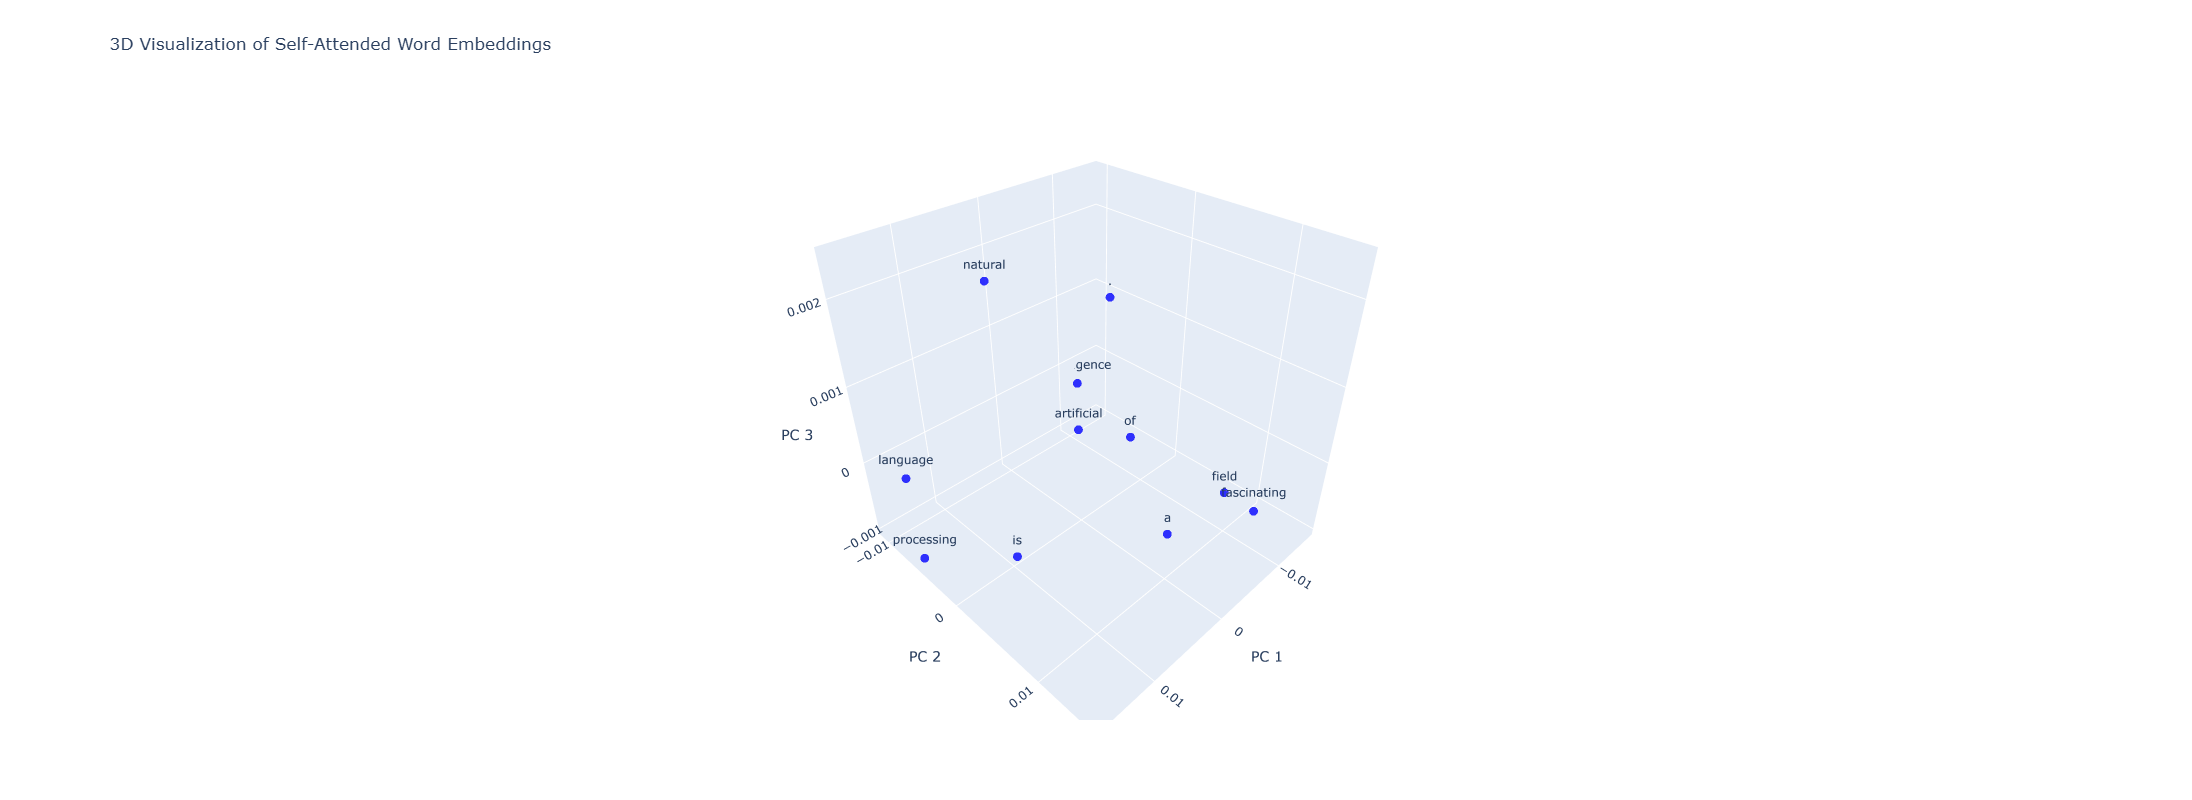

In [27]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np

# 1. Convert tensor to NumPy and reduce to 3D
embedding_np = output.detach().numpy()  # shape: (seq_len, embed_dim)
pca = PCA(n_components=3)
reduced = pca.fit_transform(embedding_np)  # shape: (seq_len, 3)

# 2. Split coordinates
x, y, z = reduced[:, 0], reduced[:, 1], reduced[:, 2]

# 3. Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers+text',
    text=tokens,
    textposition='top center',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])

fig.update_layout(
    title='3D Visualization of Self-Attended Word Embeddings',
    scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    ),  height=800
)

fig.show()

In [23]:
second_attention = SelfAttention(embed_dim=50)


In [24]:
output_2 = second_attention(output)


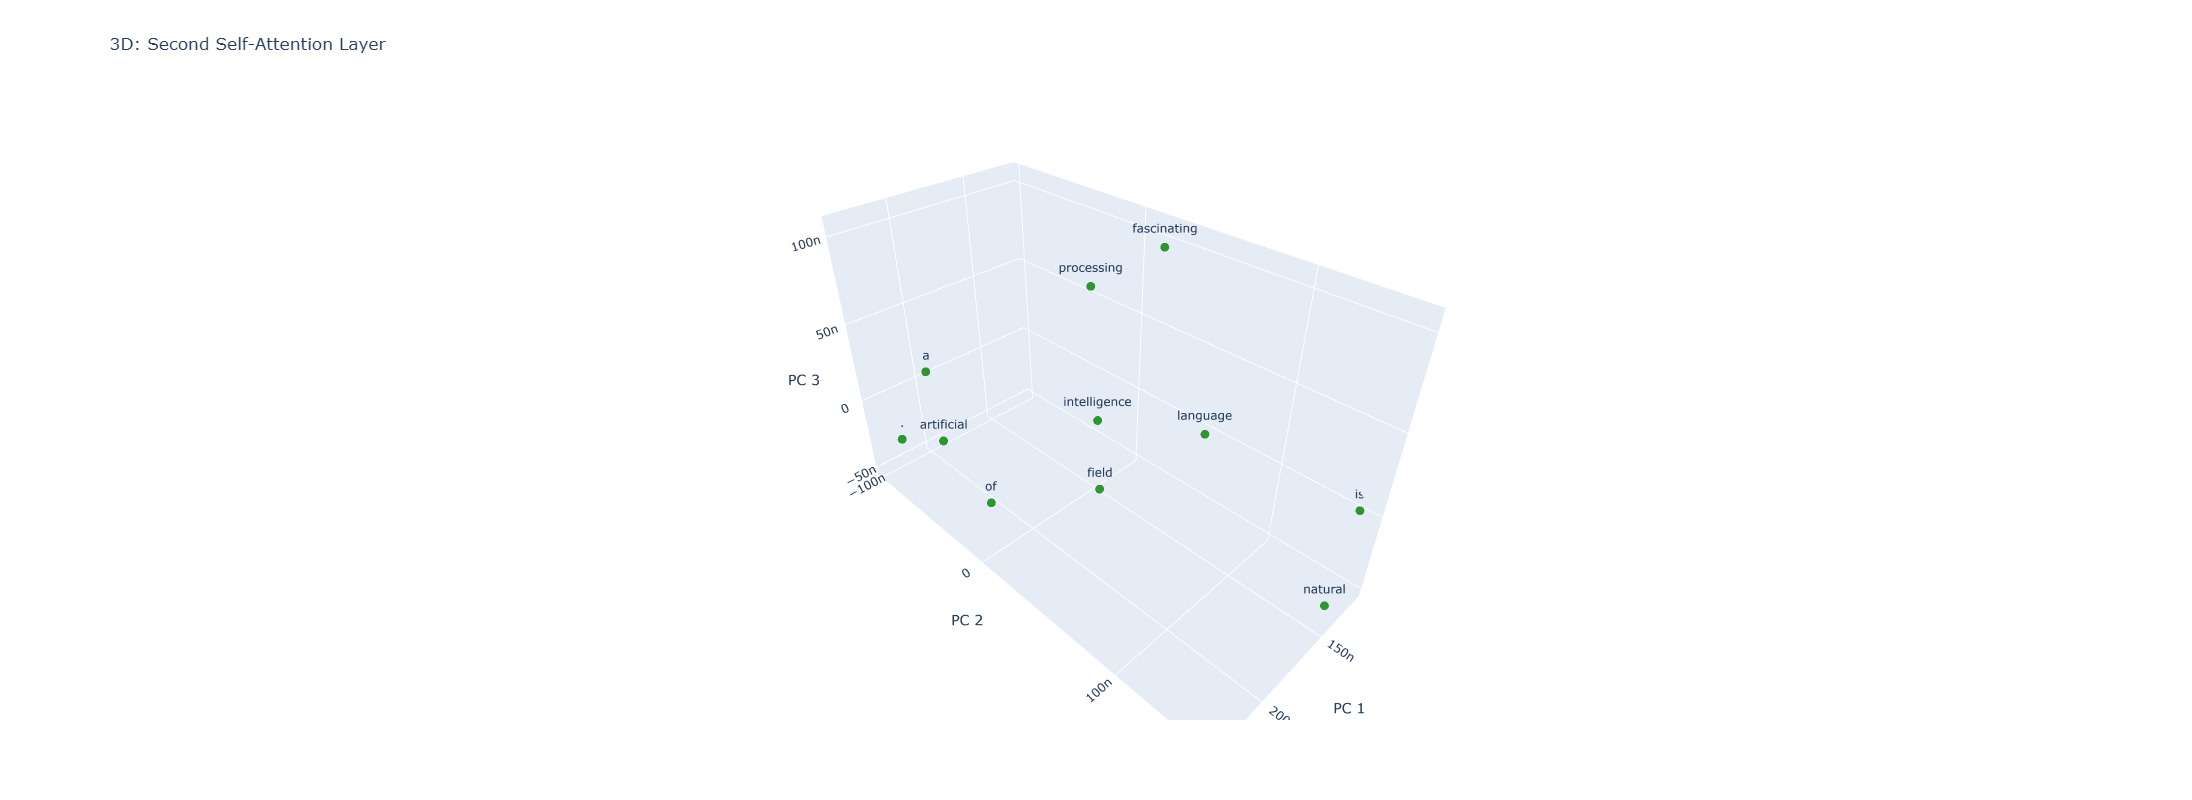

In [26]:
embedding_np = output_2.detach().numpy()
reduced = PCA(n_components=3).fit_transform(embedding_np)

x, y, z = reduced[:, 0], reduced[:, 1], reduced[:, 2]

fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    text=tokens,
    textposition='top center',
    marker=dict(size=5, color='green', opacity=0.8)
)])
fig.update_layout(title='3D: Second Self-Attention Layer',  scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    ),
    height=800)
fig.show()

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
from typing import List

In [18]:
tokens_m = paragraph.lower().split()
vocab = list(set(tokens_m))
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for word, i in word_to_ix.items()}

In [19]:
def make_context_target_pairs(tokens: List[str], context_size=2):
    data = []
    for i in range(context_size, len(tokens) - context_size):
        context = [tokens[i - j - 1] for j in reversed(range(context_size))] + \
                  [tokens[i + j + 1] for j in range(context_size)]
        target = tokens[i]
        data.append((context, target))
    return data


In [20]:
data = make_context_target_pairs(tokens)

In [21]:
data

[(['natural', 'language', 'is', 'a'], 'processing'),
 (['language', 'processing', 'a', 'fascinating'], 'is'),
 (['processing', 'is', 'fascinating', 'field'], 'a'),
 (['is', 'a', 'field', 'of'], 'fascinating'),
 (['a', 'fascinating', 'of', 'artificial'], 'field'),
 (['fascinating', 'field', 'artificial', 'intelligence'], 'of'),
 (['field', 'of', 'intelligence', '.'], 'artificial')]

In [ ]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, context_idxs):
        embeds = self.embeddings(context_idxs).mean(dim=0)
        out = self.linear(embeds)
        return out


In [ ]:

# 1. Sample paragraph

# 2. Preprocess text


# 3. Create CBOW data (context size = 2)



# 4. CBOW Model

# 5. Prepare data
def context_to_tensor(context_words):
    idxs = torch.tensor([word_to_ix[w] for w in context_words], dtype=torch.long)
    return idxs

# 6. Train the model
embedding_dim = 10
model = CBOW(len(vocab), embedding_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    total_loss = 0
    for context, target in data:
        context_idxs = context_to_tensor(context)

        model.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs.view(1, -1), torch.tensor([word_to_ix[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# 7. Get word embeddings
embeddings = model.embeddings.weight.data
for word in word_to_ix:
    print(f"{word}: {embeddings[word_to_ix[word]]}")
